<a href="https://colab.research.google.com/github/arcadiopfz/Projeto-Final/blob/main/Etapa_3_S%C3%A9ries_temporais_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 3 - Séries temporais para previsão de preços da ação Petro Rio SA (PRIO3) utilizando o Facebook Prophet



# Instalação e importação das bibliotecas

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Carregamento da base de dados

In [ ]:
from prophet import Prophet
import pandas as pd
import datetime
from datetime import datetime, timezone

In [ ]:
#Fonte dos dados: https://br.investing.com/equities/hrt-petroleo-on-nm-historical-data
dataset = pd.read_csv('/content/PRIO3 Dados Históricos.csv', usecols=['Data', 'Último'])
dataset

,Data,Último
0,29.12.2022,"37,21"
1,28.12.2022,"37,25"
2,27.12.2022,"35,58"
3,26.12.2022,"35,44"
4,23.12.2022,"35,49"
...,...,...
1963,23.01.2015,"0,63"
1964,22.01.2015,"0,63"
1965,21.01.2015,"0,44"
1966,20.01.2015,"0,33"


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    1968 non-null   object
 1   Último  1968 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


Convertendo object to float64

In [ ]:
dataset['Último'] = dataset['Último'].apply(lambda x: str(x).replace(",","."))

In [ ]:
dataset

,Data,Último
0,29.12.2022,37.21
1,28.12.2022,37.25
2,27.12.2022,35.58
3,26.12.2022,35.44
4,23.12.2022,35.49
...,...,...
1963,23.01.2015,0.63
1964,22.01.2015,0.63
1965,21.01.2015,0.44
1966,20.01.2015,0.33


Convertendo Dates and Times

In [ ]:
dataset

,Data,Último
0,29.12.2022,37.21
1,28.12.2022,37.25
2,27.12.2022,35.58
3,26.12.2022,35.44
4,23.12.2022,35.49
...,...,...
1963,23.01.2015,0.63
1964,22.01.2015,0.63
1965,21.01.2015,0.44
1966,20.01.2015,0.33


Remove timezone

In [ ]:
dataset = dataset[['Data', 'Último']].rename(columns = {'Data': 'ds', 'Último': 'y'})
dataset

,ds,y
0,29.12.2022,37.21
1,28.12.2022,37.25
2,27.12.2022,35.58
3,26.12.2022,35.44
4,23.12.2022,35.49
...,...,...
1963,23.01.2015,0.63
1964,22.01.2015,0.63
1965,21.01.2015,0.44
1966,20.01.2015,0.33


# Construção do modelo e previsões

In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp886sjb9o/wos69mjc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp886sjb9o/7uff5o8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54192', 'data', 'file=/tmp/tmp886sjb9o/wos69mjc.json', 'init=/tmp/tmp886sjb9o/7uff5o8_.json', 'output', 'file=/tmp/tmp886sjb9o/prophet_modeldep9yzhq/prophet_model-20230126042840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Definir previsão para os próximos 30 dias

In [ ]:
futuro = modelo.make_future_dataframe(periods=30)
previsoes = modelo.predict(futuro)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,0.054658,-0.416380,4.838258,0.054658,0.054658,2.017203,2.017203,2.017203,0.238563,0.238563,0.238563,1.778641,1.778641,1.778641,0.0,0.0,0.0,2.071861
1,2015-01-06,0.055976,-0.721897,4.432413,0.055976,0.055976,1.738798,1.738798,1.738798,-0.057224,-0.057224,-0.057224,1.796022,1.796022,1.796022,0.0,0.0,0.0,1.794774
2,2015-01-07,0.056635,-0.896844,4.436884,0.056635,0.056635,1.722786,1.722786,1.722786,-0.055164,-0.055164,-0.055164,1.777950,1.777950,1.777950,0.0,0.0,0.0,1.779421
3,2015-01-09,0.057953,-1.041175,4.374499,0.057953,0.057953,1.637269,1.637269,1.637269,-0.057624,-0.057624,-0.057624,1.694893,1.694893,1.694893,0.0,0.0,0.0,1.695222
4,2015-01-10,0.058612,-1.032714,4.145375,0.058612,0.058612,1.530933,1.530933,1.530933,-0.102487,-0.102487,-0.102487,1.633420,1.633420,1.633420,0.0,0.0,0.0,1.589546


In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1993,2023-01-24,31.934101,29.852394,35.033761,31.933794,31.934101,0.594310,0.594310,0.594310,-0.057224,-0.057224,-0.057224,0.651534,0.651534,0.651534,0.0,0.0,0.0,32.528411
1994,2023-01-25,31.956216,29.755078,34.989377,31.955582,31.956216,0.584796,0.584796,0.584796,-0.055164,-0.055164,-0.055164,0.639960,0.639960,0.639960,0.0,0.0,0.0,32.541013
1995,2023-01-26,31.978331,29.959366,35.239711,31.977408,31.978331,0.637509,0.637509,0.637509,-0.002223,-0.002223,-0.002223,0.639732,0.639732,0.639732,0.0,0.0,0.0,32.615840
1996,2023-01-27,32.000446,29.961598,35.072624,31.998697,32.000446,0.592654,0.592654,0.592654,-0.057624,-0.057624,-0.057624,0.650279,0.650279,0.650279,0.0,0.0,0.0,32.593101
1997,2023-01-28,32.022561,30.006874,35.373941,32.019923,32.022561,0.568290,0.568290,0.568290,-0.102487,-0.102487,-0.102487,0.670777,0.670777,0.670777,0.0,0.0,0.0,32.590851


In [ ]:
len(dataset), len(previsoes)

(1968, 1998)

In [ ]:
len(previsoes) - len(dataset)

30

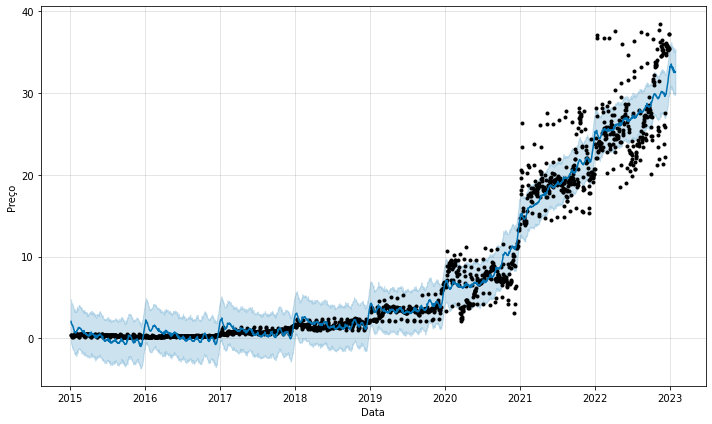

In [ ]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo, previsoes)